# Difficulties in training deep neural networks and their popular solutions
- Vanishing / Exploding Gradients
    - Weight Initialisation Strategies
    - Nonsaturating Activation Functions
    - Batch Normalisation
- Training may be extremely slow
    - Faster Optimisers
- Overfitting
    - Early Stopping
    - Data Augmentation
    - Dropout


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0

y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

## Weight Initialisation Strategies

By default, Keras uses Glorot initialisation with a uniform distribution. 
If you want to use He Initialisation, you can set `kernel_initializer="he_normal"`:

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu")) # Keras uses Glorot initialisation by default
model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal")) # He initialisation
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Nonstaurating Activation Functions

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

model.add(keras.layers.Dense(300, kernel_initializer="he_normal")) # no activation is applied to this layer
model.add(keras.layers.ELU(alpha=1.0)) # add an ELU activation layer with a specific alpha value

model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal")) # apply ELU activation to this layer

model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
elu (ELU)                    (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Batch Normalisation

Just add a `BatchNormalization` layer before or after each hidden layers' activation function, and optionally add a BN layer as well as the first layer in your model. 

There is some debate whether the BN layers should be added before or after the activation functions. 

In [5]:
# add BN layers after all hidden layers' activation function
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.BatchNormalization()) # add a BN layer after the first layer
model.add(keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal")) 
model.add(keras.layers.BatchNormalization()) # add a BN layer after the hidden layer's activation function
model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [6]:
# add BN layers before all hidden layers' activation function
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(300, kernel_initializer="he_normal")) 
model.add(keras.layers.BatchNormalization()) # add a BN layer before the hidden layer's activation function
model.add(keras.layers.ELU(alpha=1.0))

model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.ELU(alpha=1.0))

model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
elu_1 (ELU)                  (None, 300)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)              

## Faster Optimisation

In [7]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

## Early Stopping

Implmenet early stopping using `EarlyStopping` callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the `patience` argument). 
It will roll back to the best model (`restore_best_weights`). 

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=10, epochs=30, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping_cb])

## Dropout

In [9]:
# Apply dropout regularisation before every Dense layer, using a dropout rate of 0.2
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal")) 
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

## Data Augmentation

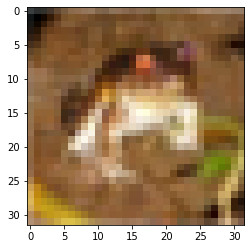

In [23]:
from keras.datasets import cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()
X_train_full = X_train_full.astype('float32')

# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0

# one-hot encoding
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

plt.imshow(X_train_full[0])
plt.show()

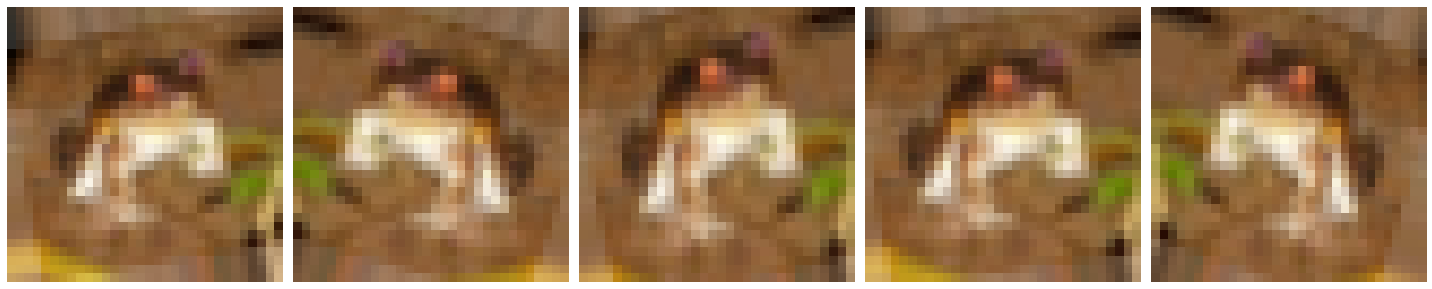

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, zoom_range=0.1)

frog_generator = datagen.flow(X_train_full[:1])
aug_images = [next(frog_generator)[0] for i in range(5)]

def plotImages(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(aug_images)

In [25]:
# build a tiny model for CIFAR 10
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [26]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, 
         steps_per_epoch=100,
         epochs=30,
         validation_data=(X_valid, y_valid))

In [ ]:
train_data_generator= datagen.flow(X_train, y_train, batch_size=32)
model.fit(train_data_generator, 
          steps_per_epoch = len(X_train) / 32,
          epochs=30,
          validation_data=(X_valid, y_valid))